# CNN Training with Fashion Data set - Pytorch A - Z

In [35]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as tranforms

torch.set_printoptions(linewidth=120)  # Displa optin for output
torch.set_grad_enabled(True) # Already on by default

In [36]:
print(torch.__version__)
print(torchvision.__version__)

1.1.0
0.3.0


In [0]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

## Fully Connected CNN

In [0]:
# class Network(nn.Module):
#     def __init__(self):
#         super(Network, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
#         self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
#         self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
#         self.fc2 = nn.Linear(in_features=120, out_features=60)
#         self.out = nn.Linear(in_features=60, out_features=10)
        
#     def forward(self, t):
#         # (1) input layer
#         t = t
        
#         # (2) hidden conv layer
#         t = self.conv1(t)
#         t = F.relu(t)
#         t = F.max_pool2d(t, kernel_size=2, stride=2)
        
#         # (3) hidden conv layer
#         t = self.conv2(t)
#         t = F.relu(t)
#         t = F.max_pool2d(t, kernel_size=2, stride=2)
        
#         # (4) hidden linear layer
#         t = t.reshape(-1, 12 * 4 * 4)
#         t = self.fc1(t)
#         t = F.relu(t)
        
#         # (5) hidden linear layer
#         t = self.fc2(t)
#         t = F.relu(t)
        
#         # (6) output layer
#         t = self.out(t)
#         #t = F.softmax(t, dim=1)
        
#         return t

## Load data set 

In [0]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=tranforms.Compose([
        tranforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(
    train_set
    ,batch_size=64
    ,shuffle=True
)

test_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=False
    ,download=True
    ,transform=tranforms.Compose([
        tranforms.ToTensor()
    ])
)

test_loader = torch.utils.data.DataLoader(
    test_set
    ,batch_size=64
    ,shuffle=True
)

## Training with a Single batch

In [0]:
# network = Network()

# optimizer = optim.Adam(network.parameters(), lr=0.01)

# batch = next(iter(train_loader)) # Get Batch
# images, labels = batch 

# preds = network(images) # Pass Batch
# loss = F.cross_entropy(preds, labels) # Calculate Loss

# loss.backward() # Calculate Gradients
# optimizer.step() # Update Weights


# print('loss 1:', loss.item())
# preds = network(images)
# loss = F.cross_entropy(preds, labels)
# print('loss 2:', loss.item())

## Training with multitle ephochs : The Complet etraining loop

In [0]:
# network = Network()

# optimizer = optim.Adam(network.parameters(), lr=0.01)

# epochs = 1

# for epoch in range(epochs):

#     total_loss = 0
#     total_correct = 0

#     for batch in train_loader: # Get Batch
#         images, labels = batch 

#         preds = network(images) # Pass Batch
#         loss = F.cross_entropy(preds, labels) # Calculate Loss

#         optimizer.zero_grad()
#         loss.backward() # Calculate Gradients
#         optimizer.step() # Update Weights

#         total_loss += loss.item()
#         total_correct += get_num_correct(preds, labels)

#     print(
#         "epoch", epoch, 
#         "total_correct:", total_correct, 
#         "loss:", total_loss,
#         "Loss % ", (total_correct / len(train_set))
#     )

In [0]:
# total_correct / len(train_set)

## Udaicity - Solution2

In [0]:
# transform = tranforms.Compose([tranforms.ToTensor(), tranforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
transform = tranforms.Compose([tranforms.ToTensor()])

train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_set
    ,batch_size=64
    ,shuffle=True
)

test_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_set
    ,batch_size=64
    ,shuffle=True
)

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,  64)
        self.fc4 = nn.Linear(64, 10)
        
        # Dropout moduel with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattented
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # Output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
            

In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [46]:

epochs = 30
steps = 0
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        logps = model(images)
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        
        test_loss = 0
        accuracy = 0
        # Trun off gradionts for validation, saves memeory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in test_loader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps =  torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader))
             )

Epoch: 1/30..  Training Loss: 0.605..  Test Loss: 0.459..  Test Accuracy: 0.831
Epoch: 2/30..  Training Loss: 0.451..  Test Loss: 0.418..  Test Accuracy: 0.854
Epoch: 3/30..  Training Loss: 0.420..  Test Loss: 0.382..  Test Accuracy: 0.862
Epoch: 4/30..  Training Loss: 0.405..  Test Loss: 0.411..  Test Accuracy: 0.852
Epoch: 5/30..  Training Loss: 0.385..  Test Loss: 0.381..  Test Accuracy: 0.864
Epoch: 6/30..  Training Loss: 0.380..  Test Loss: 0.397..  Test Accuracy: 0.864
Epoch: 7/30..  Training Loss: 0.372..  Test Loss: 0.378..  Test Accuracy: 0.866
Epoch: 8/30..  Training Loss: 0.366..  Test Loss: 0.384..  Test Accuracy: 0.864
Epoch: 9/30..  Training Loss: 0.359..  Test Loss: 0.359..  Test Accuracy: 0.871
Epoch: 10/30..  Training Loss: 0.354..  Test Loss: 0.359..  Test Accuracy: 0.866
Epoch: 11/30..  Training Loss: 0.344..  Test Loss: 0.356..  Test Accuracy: 0.876
Epoch: 12/30..  Training Loss: 0.343..  Test Loss: 0.371..  Test Accuracy: 0.875
Epoch: 13/30..  Training Loss: 0.348.

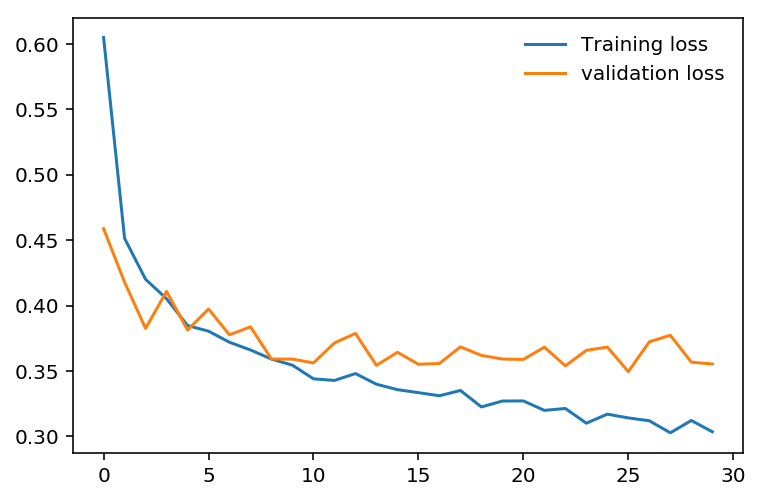

In [68]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='validation loss')
plt.legend(frameon=False)